**IS IT WHETHER OR NOT GOING TO RAIN IN AUSTRALIA?**

In this kernel I use rain in Australia dataset. This dataset contains daily weather observations from numerous Australian weather stations.

The target variable RainTomorrow means: Did it rain the next day? Yes or No.

I used **logistic regression model** for predictions. Before using sklearn library for logistic regression, I explained all the steps with the help of DATAI Team's wonderful kernel (https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners) and Udemy course (https://www.udemy.com/machine-learning-ve-python-adan-zye-makine-ogrenmesi-4/).

In order to create a logistic regression model, I followed these steps:
* Importing libraries
* Importing dataset
* Cleaning dataset
* Converting Predictions to Binary form (0 or 1)
* Excluding Tomorrow's Prediction from the Dataset (Because I wouldn't want my model to cheat)
* Normalization Progress (Scaling all the values between 0 and 1)
* Splitting Dataset for Training and Testing
* Creating the Initial Parameters (Weight and Bias)
* Defining the Sigmoid Function
* Defining Forward and Backward Propagation
* Defining Update Parameters Method
* Defining Prediction Method
* Implementing Logistic Regression Using Test Data

And at the end of this kernel I showed an easier way of doing logistic regression which is using sklearn library.

**1. IMPORTING LIBRARIES**

In [105]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['weatherAUS.csv']


**2. DATA PREPARATION**

**2.1. Importing Data**

In [106]:
data = pd.read_csv('../input/weatherAUS.csv')
data.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
42224,2011-06-09,Wollongong,8.3,16.3,0.0,NaN,NaN,WSW,59.0,WSW,W,22.0,22.0,53.0,43.0,1012.4,1010.4,NaN,NaN,11.3,15.8,No,0.0,No
129784,2017-04-09,Hobart,15.2,16.3,0.2,5.8,0.6,SSW,43.0,NNW,S,19.0,17.0,79.0,89.0,1005.0,1004.7,7.0,7.0,15.9,14.7,No,8.2,Yes
15267,2010-05-18,Newcastle,12.4,17.7,15.4,NaN,NaN,NaN,NaN,NW,SW,4.0,19.0,96.0,71.0,NaN,NaN,7.0,8.0,13.2,17.5,Yes,5.8,Yes
65132,2015-10-22,MelbourneAirport,9.6,15.9,6.2,3.0,0.0,S,48.0,SW,SW,17.0,31.0,81.0,92.0,1019.6,1020.1,8.0,8.0,13.3,12.6,Yes,0.2,No
9917,2011-10-19,CoffsHarbour,13.1,21.4,0.6,3.0,11.0,WSW,31.0,WSW,ESE,20.0,15.0,60.0,48.0,1031.2,1028.6,3.0,2.0,18.5,20.9,No,0.0,No


**2.2. Cleaning Data**

In [107]:
# Getting rid of the columns with objects which will not be used in our model:
data.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RISK_MM'], axis=1, inplace=True)
data.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [108]:
# And we need to replace NaN values with mean values of each column:
data.fillna(data.mean(), inplace=True)
data.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,No
1,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,No
2,12.9,25.7,0.0,5.469824,7.624853,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,No
3,9.2,28.0,0.0,5.469824,7.624853,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,No
4,17.5,32.3,1.0,5.469824,7.624853,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


**2.3. Converting Predictions to Binary for Logistic Regression**

In [109]:
# Now we can change that day and next days'predictions (yes and no) to 1 and 0:
data.RainToday = [1 if each == 'Yes' else 0 for each in data.RainToday]
data.RainTomorrow = [1 if each == 'Yes' else 0 for each in data.RainTomorrow]
data.sample(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
50773,6.0,16.0,0.0,5.469824,7.624853,39.984292,30.0,24.0,72.0,30.0,1017.653758,1015.258204,4.437189,4.503167,9.5,15.5,0,0
124423,6.1,14.1,3.2,5.469824,7.624853,44.000000,26.0,17.0,78.0,68.0,1018.600000,1020.200000,4.437189,4.503167,11.8,13.6,1,1
86095,19.6,21.9,87.4,5.469824,0.000000,48.000000,20.0,20.0,96.0,77.0,1015.400000,1013.700000,8.000000,8.000000,19.6,21.7,1,1


**2.4. Excluding Tomorrow's Prediction from the Dataset**

In [110]:
y = data.RainTomorrow.values
x_data = data.drop('RainTomorrow', axis=1)
x_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0
1,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0
2,12.9,25.7,0.0,5.469824,7.624853,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0
3,9.2,28.0,0.0,5.469824,7.624853,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0
4,17.5,32.3,1.0,5.469824,7.624853,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0


**2.5. Normalization Progress**

In order to be able to analyse and visualize all feature values we need to scale all the values between 0 and 1. This progress is called normalisation.

Normalization formula = (x - min(x)) / (max(x) - min(x))

In [111]:
# In order to scale all the features between 0 and 1:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0.516509,0.523629,0.001617,0.037723,0.525852,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.500352,0.508439,0.522073,0.0
1,0.375000,0.565217,0.000000,0.037723,0.525852,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.493021,0.500352,0.514768,0.570058,0.0
2,0.504717,0.576560,0.000000,0.037723,0.525852,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.493021,0.222222,0.594937,0.548944,0.0
3,0.417453,0.620038,0.000000,0.037723,0.525852,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.493021,0.500352,0.533755,0.612284,0.0
4,0.613208,0.701323,0.002695,0.037723,0.525852,0.271318,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,0.0


**2.6. Dividing Dataset for Training and Testing the Model**

80% of the dataset will be used for training the model and 20% will be used later for testing our model's accuracy.

In [112]:
# importing sklearn's library for splitting our dataset:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=75)

# For our matrix calculations we need to transpose our matrixis:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

print('x_train shape is: ', x_train.shape)
print('y_train shape is: ', y_train.shape)
print('x_test shape is: ', x_test.shape)
print('y_test shape is: ', y_test.shape)

x_train shape is:  (17, 113754)
y_train shape is:  (113754,)
x_test shape is:  (17, 28439)
y_test shape is:  (28439,)


**3. LOGISTIC REGRESSION**

**3.1. Creating the Initial Parameters (Weight and Bias)**

In [113]:
def initialize_weight_bias(dimension):
    w = np.full((dimension,1), 0.01)    # Create a matrix by the size of (dimension,1) and fill it with the values of 0.01
    b = 0.0
    return w,b

**3.2. Defining the Sigmoid Function**

Sigmoid Function is used to scale z values between 0 and 1. But this is not the same thing as the normalization.

Sigmoid function is used for explaining propability.

Let's say we have used our weight, bias and x values in this formula: **z = w*x + b**

And let's say our result for **z=5**. And when we apply it to sigmoid function we have **y_head=0.8**

**That means our model's prediction's result is 1. Because all y_head values above 0.5 (treshold value) on the graph are 1 in the sigmoid function graph.** If we have y_head = 0.4 that means our model's prediction is 0. 

Here is the sigmoid function's graph:
![](https://imgur.com/z1hx3dc.png)

In [114]:
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

**3.3. Defining Forward and Backward Propagation**

Loss function tells us if our model's prediction is correct or wrong. If the value of loss function is 1 that means our model's prediction is wrong.

Loss (error) function formula = -(1 - y) * log(1 - y_head) - y * log(y_head)

Cost function is the summation of all the loss functions. If cost function is high that means our model makes more mistakes in it's predictions.

In [115]:
def forward_backward_propagation(w, b, x_train, y_train):
    # forward propagation:
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    
    loss = -(1 - y_train) * np.log(1 - y_head) - y_train * np.log(y_head)     # loss function formula
    cost = (np.sum(loss)) / x_train.shape[1]                               # cost function formula
    
    # backward propagation:
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    
    gradients = {'derivative_weight': derivative_weight, 'derivative_bias': derivative_bias}
    
    return cost, gradients

**3.4. Defining Update Parameters Method**

We are going to tell our model how many times to initiate forward and backward propagation.

For this purpose we will use weight, bias, training datasets (x_train, y_train), number of iteration (how many times to go for-back) and our model's learning rate (how many steps our model uses while doing for-back propagation).

In [116]:
def update(w, b, x_train, y_train, learning_rate, nu_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []
    
    # Initialize for-back propagation for the number of iteration times. Then updating w and b values and writing the cost values to a list:  
    for i in range(nu_of_iteration):
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
    
        # Update weight and bias values:
        w = w - learning_rate * gradients['derivative_weight']
        b = b - learning_rate * gradients['derivative_bias']
        # Show every 20th value of cost:
        if i % 20 == 0:
            cost_list2.append(cost)
            index.append(i)
            print('Cost after iteration %i: %f' %(i,cost))
    
    parameters = {'weight': w, 'bias':b}
    
    # Visulization of cost values:
    plt.plot(index, cost_list2)
    plt.xlabel('Nu of Iteration')
    plt.ylabel('Cost Function Value')
    plt.show()
    
    return parameters, gradients, cost_list

**3.5. Defining Prediction Method**

Now we can define our prediction method. For our model's training we have used training data but for prediction we will be using our test data.



In [117]:
def prediction(w, b, x_test):
    z = sigmoid(np.dot(w.T, x_test) + b)
    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
            
    return y_prediction

**3.6. Implementing Logistic Regression Using Test Data**

Now it's time for using our x_test data and defined methods to predict y_prediction values. 

Then we will use our predictions (y_test_predictions) and real y values (y_test) to compare and calculate our model's accuracy.

In [118]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, nu_of_iteration):
    dimension = x_train.shape[0]
    w, b = initialize_weight_bias(dimension)    # Creating an initial weight matrix of (x_train data[0] x 1)
    
    # Updating our w and b by using update method. 
    # Update method contains our forward and backward propagation.
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, nu_of_iteration)
    
    # Lets use x_test for predicting y:
    y_test_predictions = prediction(parameters['weight'], parameters['bias'], x_test) 
    
    # Investigate the accuracy:
    print('Test accuracy: {}%'.format(100 - np.mean(np.abs(y_test_predictions - y_test))*100))

Let's test our model. Use logistic_regression method, train and test data, with a learning rate of 1 and run the forward backward propagation 400 times to train our model. And then show us our cost function (which should decline by the number of iterations) and accuracy of the model.

Cost after iteration 0: 0.711469
Cost after iteration 20: 0.457993
Cost after iteration 40: 0.431180
Cost after iteration 60: 0.418007
Cost after iteration 80: 0.409534
Cost after iteration 100: 0.403382
Cost after iteration 120: 0.398649
Cost after iteration 140: 0.394881
Cost after iteration 160: 0.391809
Cost after iteration 180: 0.389262
Cost after iteration 200: 0.387120
Cost after iteration 220: 0.385300
Cost after iteration 240: 0.383738
Cost after iteration 260: 0.382388
Cost after iteration 280: 0.381214
Cost after iteration 300: 0.380186
Cost after iteration 320: 0.379282
Cost after iteration 340: 0.378483
Cost after iteration 360: 0.377773
Cost after iteration 380: 0.377140


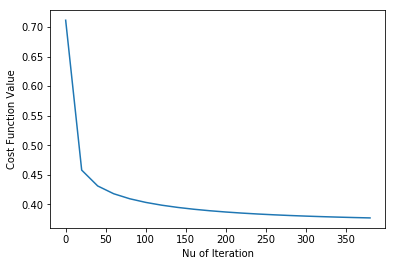

Test accuracy: 83.3221983895355%


In [119]:
logistic_regression(x_train, y_train, x_test, y_test, learning_rate=1, nu_of_iteration=400)

**4. LOGISTIC REGRESSION WITH SKLEARN LIBRARY**

In [120]:
# Importing sklearn library for logistic regression:
from sklearn.linear_model import LogisticRegression

# Creating our model named 'lr'
lr = LogisticRegression()

# Training it by using our train data:
lr.fit(x_train.T, y_train.T)

# Printing our accuracy by using our trained model and test data:
print('Test accuracy of sklearn logistic regression library: {}'.format(lr.score(x_test.T, y_test.T)))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test accuracy of sklearn logistic regression library: 0.8411688174689687


**5. CONCLUSION**

Logistic regression is a very important subject for understanding machine learning and first step to deep learning.
That's why it's so important to understand logic behind the logistic regression before using library.

Key steps for logistic regression are:

        Clean and fill the data
        
            Seperate x and y values
        
                Normalize values
            
                    Split train and test data
                
                        Define the initial weight and bias values
                    
                            Apply sigmoid function
                        
                                Implement forward and backward propagations
                            
                                    Update w and b 
                                
                                        Predict the y test values by using x test and updated w and b
                                    
                                            Compare predicted y values and y test values for accuracy


I hope you understand and liked my logistic regression kernel. If you liked it please vote it and comment your questions or ideas.

Melih..